In [61]:
%matplotlib notebook

import numpy as np

from __future__ import print_function

from sklearn_xarray import wrap, Target
from sklearn_xarray.preprocessing import Splitter, Sanitizer, Featurizer
from sklearn_xarray.model_selection import CrossValidatorWrapper
from sklearn_xarray.datasets import load_wisdm_dataarray

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GroupShuffleSplit, GridSearchCV
from sklearn.pipeline import Pipeline

import matplotlib.pyplot as plt


from sklearn.preprocessing import normalize

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

from yellowbrick.classifier import ClassificationReport


sit_dataset_acc = []
run_dataset_acc = []
lay_dataset_acc = []
walk_dataset_acc = []
stand_dataset_acc = []

sit_dataset_gyr = []
run_dataset_gyr = []
lay_dataset_gyr = []
walk_dataset_gyr = []
stand_dataset_gyr = []

for x in range(1, 16):
    if(x in [2,6,8]):
        continue
        
    sit_path_acc = "/Users/omar/Downloads/realworld2016-dataset/proband"+str(x)+"/data/acc_sitting_csv/acc_sitting_forearm.csv"
    sit_dataset_acc.append(np.genfromtxt(sit_path_acc,delimiter=',',skip_header=1,usecols = (1, 2, 3, 4)))

    run_path_acc = "/Users/omar/Downloads/realworld2016-dataset/proband"+str(x)+"/data/acc_running_csv/acc_running_forearm.csv"
    run_dataset_acc.append(np.genfromtxt(run_path_acc,delimiter=',',skip_header=1,usecols = (1, 2, 3, 4)))

    lay_path_acc = "/Users/omar/Downloads/realworld2016-dataset/proband"+str(x)+"/data/acc_lying_csv/acc_lying_forearm.csv"
    lay_dataset_acc.append(np.genfromtxt(lay_path_acc,delimiter=',',skip_header=1,usecols = (1, 2, 3, 4)))

    walk_path_acc = "/Users/omar/Downloads/realworld2016-dataset/proband"+str(x)+"/data/acc_walking_csv/acc_walking_forearm.csv"
    walk_dataset_acc.append(np.genfromtxt(walk_path_acc,delimiter=',',skip_header=1,usecols = (1, 2, 3, 4)))

    stand_path_acc = "/Users/omar/Downloads/realworld2016-dataset/proband"+str(x)+"/data/acc_standing_csv/acc_standing_forearm.csv"
    stand_dataset_acc.append(np.genfromtxt(stand_path_acc,delimiter=',',skip_header=1,usecols = (1, 2, 3, 4)))


    sit_path_gyr = "/Users/omar/Downloads/realworld2016-dataset/proband"+str(x)+"/data/gyr_sitting_csv/Gyroscope_sitting_forearm.csv"
    sit_dataset_gyr.append(np.genfromtxt(sit_path_gyr,delimiter=',',skip_header=1,usecols = (1, 2, 3, 4)))

    run_path_gyr = "/Users/omar/Downloads/realworld2016-dataset/proband"+str(x)+"/data/gyr_running_csv/Gyroscope_running_forearm.csv"
    run_dataset_gyr.append(np.genfromtxt(run_path_gyr,delimiter=',',skip_header=1,usecols = (1, 2, 3, 4)))

    lay_path_gyr = "/Users/omar/Downloads/realworld2016-dataset/proband"+str(x)+"/data/gyr_lying_csv/Gyroscope_lying_forearm.csv"
    lay_dataset_gyr.append(np.genfromtxt(lay_path_gyr,delimiter=',',skip_header=1,usecols = (1, 2, 3, 4)))

    walk_path_gyr = "/Users/omar/Downloads/realworld2016-dataset/proband"+str(x)+"/data/gyr_walking_csv/Gyroscope_walking_forearm.csv"
    walk_dataset_gyr.append(np.genfromtxt(walk_path_gyr,delimiter=',',skip_header=1,usecols = (1, 2, 3, 4)))

    stand_path_gyr = "/Users/omar/Downloads/realworld2016-dataset/proband"+str(x)+"/data/gyr_standing_csv/Gyroscope_standing_forearm.csv"
    stand_dataset_gyr.append(np.genfromtxt(stand_path_gyr,delimiter=',',skip_header=1,usecols = (1, 2, 3, 4)))

    

    # Check data size
    print("Proband "+str(x))
    print("Acc Sitting Records: ", sit_dataset_acc[-1].shape)
    print("Acc Running Records: ", run_dataset_acc[-1].shape)
    print("Acc Laying Records: ", lay_dataset_acc[-1].shape)
    print("Acc Walking Records: ", walk_dataset_acc[-1].shape)
    print("Acc Standing Records: ", stand_dataset_acc[-1].shape)
    print("")
    print("Gyr Sitting Records: ", sit_dataset_gyr[-1].shape)
    print("Gyr Running Records: ", run_dataset_gyr[-1].shape)
    print("Gyr Laying Records: ", lay_dataset_gyr[-1].shape)
    print("Gyr Walking Records: ", walk_dataset_gyr[-1].shape)
    print("Gyr Standing Records: ", stand_dataset_gyr[-1].shape)
    print("")
    print("")

Proband 1
Acc Sitting Records:  (32833, 4)
Acc Running Records:  (30429, 4)
Acc Laying Records:  (31229, 4)
Acc Walking Records:  (31793, 4)
Acc Standing Records:  (31924, 4)

Gyr Sitting Records:  (33267, 4)
Gyr Running Records:  (30958, 4)
Gyr Laying Records:  (31822, 4)
Gyr Walking Records:  (31912, 4)
Gyr Standing Records:  (32546, 4)


Proband 3
Acc Sitting Records:  (31352, 4)
Acc Running Records:  (37708, 4)
Acc Laying Records:  (31379, 4)
Acc Walking Records:  (33910, 4)
Acc Standing Records:  (31054, 4)

Gyr Sitting Records:  (31893, 4)
Gyr Running Records:  (38359, 4)
Gyr Laying Records:  (31967, 4)
Gyr Walking Records:  (34558, 4)
Gyr Standing Records:  (31560, 4)


Proband 4
Acc Sitting Records:  (31626, 4)
Acc Running Records:  (51914, 4)
Acc Laying Records:  (33607, 4)
Acc Walking Records:  (30842, 4)
Acc Standing Records:  (30057, 4)

Gyr Sitting Records:  (32254, 4)
Gyr Running Records:  (52686, 4)
Gyr Laying Records:  (34196, 4)
Gyr Walking Records:  (31398, 4)
Gyr Sta

In [62]:
for x in range(len(sit_dataset_acc)):
    # Normalize Time Column
    print("Proband" + str(x))

    time = sit_dataset_acc[x][:,0]
    time = time-time[0]
    time = time.astype(int)
    print("Acc Sitting Total Time:" , round(time[-1]/60000,2) , " minutes")

    time = run_dataset_acc[x][:,0]
    time = time-time[0]
    time = time.astype(int)
    print("Acc Running Total Time:" , round(time[-1]/60000,2) , " minutes")

    time = lay_dataset_acc[x][:,0]
    time = time-time[0]
    time = time.astype(int)
    print("Acc Laying Total Time:" , round(time[-1]/60000,2) , " minutes")

    time = walk_dataset_acc[x][:,0]
    time = time-time[0]
    time = time.astype(int)
    print("Acc Walking Total Time:" , round(time[-1]/60000,2) , " minutes")

    time = stand_dataset_acc[x][:,0]
    time = time-time[0]
    time = time.astype(int)
    print("Acc Standing Total Time:" , round(time[-1]/60000,2) , " minutes")

    print("")

    time = sit_dataset_gyr[x][:,0]
    time = time-time[0]
    time = time.astype(int)
    print("Gyr Sitting Total Time:" , round(time[-1]/60000,2) , " minutes")

    time = run_dataset_gyr[x][:,0]
    time = time-time[0]
    time = time.astype(int)
    print("Gyr Running Total Time:" , round(time[-1]/60000,2) , " minutes")

    time = lay_dataset_gyr[x][:,0]
    time = time-time[0]
    time = time.astype(int)
    print("Gyr Laying Total Time:" , round(time[-1]/60000,2) , " minutes")

    time = walk_dataset_gyr[x][:,0]
    time = time-time[0]
    time = time.astype(int)
    print("Gyr Walking Total Time:" , round(time[-1]/60000,2) , " minutes")

    time = stand_dataset_gyr[x][:,0]
    time = time-time[0]
    time = time.astype(int)
    print("Gyr Standing Total Time:" , round(time[-1]/60000,2) , " minutes")

    print("")
    print("")

Proband0
Acc Sitting Total Time: 10.97  minutes
Acc Running Total Time: 10.21  minutes
Acc Laying Total Time: 10.48  minutes
Acc Walking Total Time: 10.66  minutes
Acc Standing Total Time: 10.72  minutes

Gyr Sitting Total Time: 10.97  minutes
Gyr Running Total Time: 10.21  minutes
Gyr Laying Total Time: 10.48  minutes
Gyr Walking Total Time: 10.66  minutes
Gyr Standing Total Time: 10.72  minutes


Proband1
Acc Sitting Total Time: 10.52  minutes
Acc Running Total Time: 12.66  minutes
Acc Laying Total Time: 10.53  minutes
Acc Walking Total Time: 11.38  minutes
Acc Standing Total Time: 10.42  minutes

Gyr Sitting Total Time: 10.52  minutes
Gyr Running Total Time: 12.66  minutes
Gyr Laying Total Time: 10.53  minutes
Gyr Walking Total Time: 11.38  minutes
Gyr Standing Total Time: 10.41  minutes


Proband2
Acc Sitting Total Time: 10.62  minutes
Acc Running Total Time: 17.41  minutes
Acc Laying Total Time: 11.27  minutes
Acc Walking Total Time: 10.35  minutes
Acc Standing Total Time: 10.09  

In [63]:
# Combine Data

# dataset = np.concatenate([cd_dataset_1,cd_dataset_2,cd_dataset_3,cd_dataset_4,cd_dataset_5, sit_dataset_1,sit_dataset_2,sit_dataset_3,sit_dataset_4,sit_dataset_5, run_dataset_1,run_dataset_2,run_dataset_3,run_dataset_4,run_dataset_5, lay_dataset_1, lay_dataset_2, lay_dataset_3, lay_dataset_4, lay_dataset_5, walk_dataset_1,walk_dataset_2, walk_dataset_3,walk_dataset_4,walk_dataset_5, stand_dataset_1,stand_dataset_2,stand_dataset_3,stand_dataset_4,stand_dataset_5])


dataset_acc = np.concatenate([np.concatenate(sit_dataset_acc), np.concatenate(run_dataset_acc), np.concatenate(lay_dataset_acc), np.concatenate(walk_dataset_acc), np.concatenate(stand_dataset_acc)])
dataset_gyr = np.concatenate([np.concatenate(sit_dataset_gyr), np.concatenate(run_dataset_gyr), np.concatenate(lay_dataset_gyr), np.concatenate(walk_dataset_gyr), np.concatenate(stand_dataset_gyr)])

print(dataset_acc.shape)
print(dataset_gyr.shape)

print(len(dataset_acc))
print(len(dataset_gyr))
diff = 1977009 - 2010370
print(diff)
dataset_gyr = dataset_gyr[:diff]
print(dataset_gyr.shape)

(1977009, 4)
(2010370, 4)
1977009
2010370
-33361
(1977009, 4)


In [64]:
# Combine Acc and Gyr

dataset = np.c_[dataset_acc, dataset_gyr]

dataset.shape

(1977009, 8)

In [66]:
# plt.plot(X)
# plt.plot(dataset[:,1])
# plt.plot(dataset[:,2])
# plt.plot(dataset[0:100,1])

readings_per_second = 50

head = 0;

print(len(sit_dataset_acc))

# cd_start = []
# cd_end = []
sit_start = []
sit_end = []
run_start = []
run_end = []
lay_start = []
lay_end = []
walk_start = []
walk_end = []
stand_start = []
stand_end = []

# for x in range(len(sit_dataset_acc)):
#     cd_start.append(head + (readings_per_second * 10))
#     cd_end.append(head + (readings_per_second * 310))

#     head += cd_dataset[x].shape[0]

for x in range(len(sit_dataset_acc)):
    sit_start.append(head + (readings_per_second * 0))
    sit_end.append(head + (readings_per_second * 600))

    head += sit_dataset_acc[x].shape[0]


for x in range(len(sit_dataset_acc)):
    run_start.append(head + (readings_per_second * 0))
    run_end.append(head + (readings_per_second * 600))

    head += run_dataset_acc[x].shape[0]

for x in range(len(sit_dataset_acc)):
    lay_start.append(head + (readings_per_second * 0))
    lay_end.append(head + (readings_per_second * 600))

    head += lay_dataset_acc[x].shape[0]

for x in range(len(sit_dataset_acc)):
    walk_start.append(head + (readings_per_second * 0))
    walk_end.append(head + (readings_per_second * 600))

    head += walk_dataset_acc[x].shape[0]

for x in range(len(sit_dataset_acc)):
    stand_start.append(head + (readings_per_second * 0))
    stand_end.append(head + (readings_per_second * 600))

    head += stand_dataset_acc[x].shape[0]

    
    
for x in range(len(sit_dataset_acc)):
    print("Proband"+str(x))
#     print(cd_end[x]-cd_start[x])
    print(sit_end[x]-sit_start[x])
    print(run_end[x]-run_start[x])
    print(lay_end[x]-lay_start[x])
    print(walk_end[x]-walk_start[x])
    print(stand_end[x]-stand_start[x])



12
Proband0
30000
30000
30000
30000
30000
Proband1
30000
30000
30000
30000
30000
Proband2
30000
30000
30000
30000
30000
Proband3
30000
30000
30000
30000
30000
Proband4
30000
30000
30000
30000
30000
Proband5
30000
30000
30000
30000
30000
Proband6
30000
30000
30000
30000
30000
Proband7
30000
30000
30000
30000
30000
Proband8
30000
30000
30000
30000
30000
Proband9
30000
30000
30000
30000
30000
Proband10
30000
30000
30000
30000
30000
Proband11
30000
30000
30000
30000
30000


In [67]:

#Normalize Data, Get only the data between start and end
# time = dataset[cd_start:cd_end,0]-dataset[0,0]
X_acc = dataset[:,1]
Y_acc = dataset[:,2]
Z_acc = dataset[:,3]

X_gyr = dataset[:,1]
Y_gyr = dataset[:,2]
Z_gyr = dataset[:,3]

X_acc = normalize(X_acc[:,np.newaxis],norm='max', axis=0).ravel()
Y_acc = normalize(Y_acc[:,np.newaxis],norm='max', axis=0).ravel()
Z_acc = normalize(Z_acc[:,np.newaxis],norm='max', axis=0).ravel()


X_gyr = normalize(X_gyr[:,np.newaxis],norm='max', axis=0).ravel()
Y_gyr = normalize(Y_gyr[:,np.newaxis],norm='max', axis=0).ravel()
Z_gyr = normalize(Z_gyr[:,np.newaxis],norm='max', axis=0).ravel()


sit_X_acc = []
sit_Y_acc = []
sit_Z_acc = []

run_X_acc = []
run_Y_acc = []
run_Z_acc = []

lay_X_acc = []
lay_Y_acc = []
lay_Z_acc = []

walk_X_acc = []
walk_Y_acc = []
walk_Z_acc = []

stand_X_acc = []
stand_Y_acc = []
stand_Z_acc = []


sit_X_gyr = []
sit_Y_gyr = []
sit_Z_gyr = []

run_X_gyr = []
run_Y_gyr = []
run_Z_gyr = []

lay_X_gyr = []
lay_Y_gyr = []
lay_Z_gyr = []

walk_X_gyr = []
walk_Y_gyr = []
walk_Z_gyr = []

stand_X_gyr = []
stand_Y_gyr = []
stand_Z_gyr = []


for i in range(len(sit_dataset_acc)):

    sit_X_acc = np.append(sit_X_acc,X_acc[sit_start[i]:sit_end[i]])
    sit_Y_acc = np.append(sit_Y_acc,Y_acc[sit_start[i]:sit_end[i]])
    sit_Z_acc = np.append(sit_Z_acc,Z_acc[sit_start[i]:sit_end[i]])

    run_X_acc = np.append(run_X_acc,X_acc[run_start[i]:run_end[i]])
    run_Y_acc = np.append(run_Y_acc,Y_acc[run_start[i]:run_end[i]])
    run_Z_acc = np.append(run_Z_acc,Z_acc[run_start[i]:run_end[i]])

    lay_X_acc = np.append(lay_X_acc,X_acc[lay_start[i]:lay_end[i]])
    lay_Y_acc = np.append(lay_Y_acc,Y_acc[lay_start[i]:lay_end[i]])
    lay_Z_acc = np.append(lay_Z_acc,Z_acc[lay_start[i]:lay_end[i]])

    walk_X_acc = np.append(walk_X_acc,X_acc[walk_start[i]:walk_end[i]])
    walk_Y_acc = np.append(walk_Y_acc,Y_acc[walk_start[i]:walk_end[i]])
    walk_Z_acc = np.append(walk_Z_acc,Z_acc[walk_start[i]:walk_end[i]])

    stand_X_acc = np.append(stand_X_acc,X_acc[stand_start[i]:stand_end[i]])
    stand_Y_acc = np.append(stand_Y_acc,Y_acc[stand_start[i]:stand_end[i]])
    stand_Z_acc = np.append(stand_Z_acc,Z_acc[stand_start[i]:stand_end[i]])


    sit_X_gyr = np.append(sit_X_gyr,X_gyr[sit_start[i]:sit_end[i]])
    sit_Y_gyr = np.append(sit_Y_gyr,Y_gyr[sit_start[i]:sit_end[i]])
    sit_Z_gyr = np.append(sit_Z_gyr,Z_gyr[sit_start[i]:sit_end[i]])

    run_X_gyr = np.append(run_X_gyr,X_gyr[run_start[i]:run_end[i]])
    run_Y_gyr = np.append(run_Y_gyr,Y_gyr[run_start[i]:run_end[i]])
    run_Z_gyr = np.append(run_Z_gyr,Z_gyr[run_start[i]:run_end[i]])

    lay_X_gyr = np.append(lay_X_gyr,X_gyr[lay_start[i]:lay_end[i]])
    lay_Y_gyr = np.append(lay_Y_gyr,Y_gyr[lay_start[i]:lay_end[i]])
    lay_Z_gyr = np.append(lay_Z_gyr,Z_gyr[lay_start[i]:lay_end[i]])

    walk_X_gyr = np.append(walk_X_gyr,X_gyr[walk_start[i]:walk_end[i]])
    walk_Y_gyr = np.append(walk_Y_gyr,Y_gyr[walk_start[i]:walk_end[i]])
    walk_Z_gyr = np.append(walk_Z_gyr,Z_gyr[walk_start[i]:walk_end[i]])

    stand_X_gyr = np.append(stand_X_gyr,X_gyr[stand_start[i]:stand_end[i]])
    stand_Y_gyr = np.append(stand_Y_gyr,Y_gyr[stand_start[i]:stand_end[i]])
    stand_Z_gyr = np.append(stand_Z_gyr,Z_gyr[stand_start[i]:stand_end[i]])

print("combined")
print(sit_X_acc.shape)


combined
(360000,)


In [68]:

# # plt.plot(X)
# # plt.plot(Y)
# # plt.plot(Z)
# plt.rcParams['figure.figsize'] = (10, 15)

# plt.subplot(7, 3, 1)
# plt.plot(time/1000, cd_X, 'b')
# plt.title('X_attr')
# plt.ylabel('Climbing Down')
# plt.ylim([-0.015, 0.005])

# plt.subplot(7, 3, 4)
# plt.plot(time/1000, sit_X, 'b')
# plt.ylabel('Sitting Acceleration')
# plt.ylim([-0.015, 0.005])


# plt.subplot(7, 3, 10)
# plt.plot(time/1000, run_X, 'b')
# plt.ylabel('Running Acceleration')
# plt.ylim([-0.015, 0.005])

# plt.subplot(7, 3, 13)
# plt.plot(time/1000, lay_X, 'b')
# plt.ylabel('Laying Acceleration')
# plt.ylim([-0.015, 0.005])


# plt.subplot(7, 3, 16)
# plt.plot(time/1000, walk_X, 'b')
# plt.ylabel('Walking Acceleration')
# plt.ylim([-0.015, 0.005])

# plt.subplot(7, 3, 19)
# plt.plot(time/1000, stand_X, 'b')
# plt.ylabel('Laying Acceleration')
# plt.xlabel('time (s)')
# plt.ylim([-0.015, 0.005])




# plt.subplot(7, 3, 2)
# plt.plot(time/1000, cd_Y, 'g')
# plt.title('Y_attr')
# plt.ylim([-0.007, 0.003])

# plt.subplot(7, 3, 5)
# plt.plot(time/1000, sit_Y, 'g')
# plt.ylim([-0.007, 0.003])


# plt.subplot(7, 3, 11)
# plt.plot(time/1000, run_Y, 'g')
# plt.ylim([-0.007, 0.003])

# plt.subplot(7, 3, 14)
# plt.plot(time/1000, lay_Y, 'g')
# plt.ylim([-0.007, 0.003])


# plt.subplot(7, 3, 17)
# plt.plot(time/1000, walk_Y, 'g')
# plt.ylim([-0.007, 0.003])


# plt.subplot(7, 3, 20)
# plt.plot(time/1000, stand_Y, 'g')
# plt.xlabel('time (s)')
# plt.ylim([-0.007, 0.003])




# plt.subplot(7, 3, 3)
# plt.plot(time/1000, cd_Z, 'r')
# plt.title('Z_attr')
# plt.ylim([-0.01, 0.01])

# plt.subplot(7, 3, 6)
# plt.plot(time/1000, sit_Z, 'r')
# plt.ylim([-0.01, 0.01])


# plt.subplot(7, 3, 12)
# plt.plot(time/1000, run_Z, 'r')
# plt.ylim([-0.007, 0.003])

# plt.subplot(7, 3, 15)
# plt.plot(time/1000, lay_Z, 'r')
# plt.ylim([-0.007, 0.003])


# plt.subplot(7, 3, 18)
# plt.plot(time/1000, walk_Z, 'r')
# plt.ylim([-0.007, 0.003])

# plt.subplot(7, 3, 21)
# plt.plot(time/1000, stand_Z, 'r')
# plt.xlabel('time (s)')
# plt.ylim([-0.007, 0.003])




# plt.show()

In [69]:
def rolling_window(a, window):
    shape = a.shape[:-1] + (a.shape[-1] - window + 1, window)
    strides = a.strides + (a.strides[-1],)
    return np.lib.stride_tricks.as_strided(a, shape=shape, strides=strides)

In [70]:
# cd_X_rolling = np.std(rolling_window(cd_X, readings_per_second), 1)
# cd_X_rolling
# cd_Y_rolling = np.std(rolling_window(cd_Y, readings_per_second), 1)
# cd_Y_rolling
# cd_Z_rolling = np.std(rolling_window(cd_Z, readings_per_second), 1)
# cd_Z_rolling
# cd_X_Y_Z = np.vstack((cd_X_rolling, cd_Y_rolling, cd_Z_rolling)).T
# cd_X_Y_Z

In [71]:
sit_X_acc_rolling = np.std(rolling_window(sit_X_acc, readings_per_second), 1)
sit_Y_acc_rolling = np.std(rolling_window(sit_Y_acc, readings_per_second), 1)
sit_Z_acc_rolling = np.std(rolling_window(sit_Z_acc, readings_per_second), 1)
sit_X_Y_Z_acc = np.vstack((sit_X_acc_rolling, sit_Y_acc_rolling, sit_Z_acc_rolling)).T

sit_X_gyr_rolling = np.std(rolling_window(sit_X_gyr, readings_per_second), 1)
sit_Y_gyr_rolling = np.std(rolling_window(sit_Y_gyr, readings_per_second), 1)
sit_Z_gyr_rolling = np.std(rolling_window(sit_Z_gyr, readings_per_second), 1)
sit_X_Y_Z_gyr = np.vstack((sit_X_gyr_rolling, sit_Y_gyr_rolling, sit_Z_gyr_rolling)).T
sit_X_Y_Z_gyr

array([[0.00100838, 0.00124832, 0.00193375],
       [0.00102433, 0.00124382, 0.00197818],
       [0.00101821, 0.00120642, 0.00199244],
       ...,
       [0.0010903 , 0.00224553, 0.00114732],
       [0.00110921, 0.00223613, 0.00114781],
       [0.00110571, 0.00219145, 0.0011585 ]])

In [72]:
# jump_X_rolling = np.std(rolling_window(jump_X, readings_per_second), 1)
# jump_X_rolling
# jump_Y_rolling = np.std(rolling_window(jump_Y, readings_per_second), 1)
# jump_Y_rolling
# jump_Z_rolling = np.std(rolling_window(jump_Z, readings_per_second), 1)
# jump_Z_rolling
# jump_X_Y_Z = np.vstack((jump_X_rolling, jump_Y_rolling, jump_Z_rolling)).T
# jump_X_Y_Z

In [73]:
run_X_acc_rolling = np.std(rolling_window(run_X_acc, readings_per_second), 1)
run_Y_acc_rolling = np.std(rolling_window(run_Y_acc, readings_per_second), 1)
run_Z_acc_rolling = np.std(rolling_window(run_Z_acc, readings_per_second), 1)
run_X_Y_Z_acc = np.vstack((run_X_acc_rolling, run_Y_acc_rolling, run_Z_acc_rolling)).T

run_X_gyr_rolling = np.std(rolling_window(run_X_gyr, readings_per_second), 1)
run_Y_gyr_rolling = np.std(rolling_window(run_Y_gyr, readings_per_second), 1)
run_Z_gyr_rolling = np.std(rolling_window(run_Z_gyr, readings_per_second), 1)
run_X_Y_Z_gyr = np.vstack((run_X_gyr_rolling, run_Y_gyr_rolling, run_Z_gyr_rolling)).T
run_X_Y_Z_gyr

array([[0.00146764, 0.00341628, 0.00235216],
       [0.00146401, 0.00350197, 0.00232939],
       [0.00146278, 0.00355245, 0.00233608],
       ...,
       [0.01189202, 0.00615153, 0.00675908],
       [0.01189278, 0.00597584, 0.00697835],
       [0.01192144, 0.00585154, 0.00734958]])

In [74]:
lay_X_acc_rolling = np.std(rolling_window(lay_X_acc, readings_per_second), 1)
lay_Y_acc_rolling = np.std(rolling_window(lay_Y_acc, readings_per_second), 1)
lay_Z_acc_rolling = np.std(rolling_window(lay_Z_acc, readings_per_second), 1)
lay_X_Y_Z_acc = np.vstack((lay_X_acc_rolling, lay_Y_acc_rolling, lay_Z_acc_rolling)).T

lay_X_gyr_rolling = np.std(rolling_window(lay_X_gyr, readings_per_second), 1)
lay_Y_gyr_rolling = np.std(rolling_window(lay_Y_gyr, readings_per_second), 1)
lay_Z_gyr_rolling = np.std(rolling_window(lay_Z_gyr, readings_per_second), 1)
lay_X_Y_Z_gyr = np.vstack((lay_X_gyr_rolling, lay_Y_gyr_rolling, lay_Z_gyr_rolling)).T
lay_X_Y_Z_gyr


array([[0.0032616 , 0.01712011, 0.01813946],
       [0.00368641, 0.02186054, 0.01857997],
       [0.00588405, 0.02333983, 0.01989158],
       ...,
       [0.00441921, 0.00678803, 0.00861072],
       [0.0043999 , 0.00678802, 0.0087187 ],
       [0.00442811, 0.00686226, 0.00910594]])

In [75]:
walk_X_acc_rolling = np.std(rolling_window(walk_X_acc, readings_per_second), 1)
walk_Y_acc_rolling = np.std(rolling_window(walk_Y_acc, readings_per_second), 1)
walk_Z_acc_rolling = np.std(rolling_window(walk_Z_acc, readings_per_second), 1)
walk_X_Y_Z_acc = np.vstack((walk_X_acc_rolling, walk_Y_acc_rolling, walk_Z_acc_rolling)).T

walk_X_gyr_rolling = np.std(rolling_window(walk_X_gyr, readings_per_second), 1)
walk_Y_gyr_rolling = np.std(rolling_window(walk_Y_gyr, readings_per_second), 1)
walk_Z_gyr_rolling = np.std(rolling_window(walk_Z_gyr, readings_per_second), 1)
walk_X_Y_Z_gyr = np.vstack((walk_X_gyr_rolling, walk_Y_gyr_rolling, walk_Z_gyr_rolling)).T
walk_X_Y_Z_gyr


array([[0.00120453, 0.00109145, 0.001939  ],
       [0.00118244, 0.00109774, 0.00189853],
       [0.0011876 , 0.00102111, 0.00188918],
       ...,
       [0.10188681, 0.03985165, 0.04161925],
       [0.10587824, 0.040313  , 0.03965026],
       [0.10841033, 0.04024665, 0.03881043]])

In [76]:
stand_X_acc_rolling = np.std(rolling_window(stand_X_acc, readings_per_second), 1)
stand_Y_acc_rolling = np.std(rolling_window(stand_Y_acc, readings_per_second), 1)
stand_Z_acc_rolling = np.std(rolling_window(stand_Z_acc, readings_per_second), 1)
stand_X_Y_Z_acc = np.vstack((stand_X_acc_rolling, stand_Y_acc_rolling, stand_Z_acc_rolling)).T

stand_X_gyr_rolling = np.std(rolling_window(stand_X_gyr, readings_per_second), 1)
stand_Y_gyr_rolling = np.std(rolling_window(stand_Y_gyr, readings_per_second), 1)
stand_Z_gyr_rolling = np.std(rolling_window(stand_Z_gyr, readings_per_second), 1)
stand_X_Y_Z_gyr = np.vstack((stand_X_gyr_rolling, stand_Y_gyr_rolling, stand_Z_gyr_rolling)).T
stand_X_Y_Z_gyr


array([[0.00125141, 0.00252818, 0.00178652],
       [0.00126136, 0.00253312, 0.00178394],
       [0.00129241, 0.00253789, 0.00172743],
       ...,
       [0.00831602, 0.01333192, 0.01314223],
       [0.008373  , 0.01347998, 0.01311109],
       [0.0083085 , 0.01363407, 0.01311992]])

In [77]:
# cu_X_rolling = np.std(rolling_window(cu_X, readings_per_second), 1)
# cu_X_rolling
# cu_Y_rolling = np.std(rolling_window(cu_Y, readings_per_second), 1)
# cu_Y_rolling
# cu_Z_rolling = np.std(rolling_window(cu_Z, readings_per_second), 1)
# cu_Z_rolling
# cu_X_Y_Z = np.vstack((cu_X_rolling, cu_Y_rolling, cu_Z_rolling)).T
# cu_X_Y_Z

In [82]:
print(sit_X_Y_Z_acc.shape)
print(run_X_Y_Z_acc.shape)
print(lay_X_Y_Z_acc.shape)
print(walk_X_Y_Z_acc.shape)
print(stand_X_Y_Z_acc.shape)

print(sit_X_Y_Z_gyr.shape)
print(run_X_Y_Z_gyr.shape)
print(lay_X_Y_Z_gyr.shape)
print(walk_X_Y_Z_gyr.shape)
print(stand_X_Y_Z_gyr.shape)

sit_X_Y_Z = np.c_[sit_X_Y_Z_acc, sit_X_Y_Z_gyr]
run_X_Y_Z = np.c_[run_X_Y_Z_acc, run_X_Y_Z_gyr]
lay_X_Y_Z = np.c_[lay_X_Y_Z_acc, lay_X_Y_Z_gyr]
walk_X_Y_Z = np.c_[walk_X_Y_Z_acc, walk_X_Y_Z_gyr]
stand_X_Y_Z = np.c_[stand_X_Y_Z_acc, stand_X_Y_Z_gyr]
stand_X_Y_Z.shape

(359951, 3)
(359951, 3)
(359951, 3)
(359951, 3)
(359951, 3)
(359951, 3)
(359951, 3)
(359951, 3)
(359951, 3)
(359951, 3)


(359951, 6)

In [83]:
sit_splits = np.split(sit_X_Y_Z[:-11],len(sit_dataset_acc))
run_splits = np.split(run_X_Y_Z[:-11],len(sit_dataset_acc))
lay_splits = np.split(lay_X_Y_Z[:-11],len(sit_dataset_acc))
walk_splits = np.split(walk_X_Y_Z[:-11],len(sit_dataset_acc))
stand_splits = np.split(stand_X_Y_Z[:-11],len(sit_dataset_acc))



values = [[0,0,0,0,0,0]]
labels = []

for i in range(len(sit_dataset_acc)):
    i_values = np.concatenate(([sit_splits[i],run_splits[i],lay_splits[i],walk_splits[i],stand_splits[i]]))
    values = np.append(values,i_values, axis=0)
    i_labels = np.concatenate((np.repeat("Sit", sit_splits[i].shape[0]),np.repeat("Run", run_splits[i].shape[0]),np.repeat("Lay", lay_splits[i].shape[0]),np.repeat("Walk", walk_splits[i].shape[0]),np.repeat("Stand", stand_splits[i].shape[0])))
    labels = np.append(labels,i_labels)
    
values = np.delete(values,0,0)
    
print(values.shape)
print(labels.shape)

(1799700, 6)
(1799700,)


In [84]:
X_train, X_test, y_train, y_test = train_test_split(values, labels, test_size=0.20)
print(X_train)
print(X_test)
print(y_train)
print(y_test)

[[0.00356446 0.009999   0.00501552 0.00356446 0.009999   0.00501552]
 [0.00977315 0.01837564 0.03393313 0.00977315 0.01837564 0.03393313]
 [0.13446014 0.04366378 0.05113296 0.13446014 0.04366378 0.05113296]
 ...
 [0.01613304 0.05710143 0.03515275 0.01613304 0.05710143 0.03515275]
 [0.29915194 0.40883856 0.10333463 0.29915194 0.40883856 0.10333463]
 [0.15091293 0.07822987 0.07880021 0.15091293 0.07822987 0.07880021]]
[[0.15605455 0.09123832 0.10283747 0.15605455 0.09123832 0.10283747]
 [0.02604107 0.03906237 0.03206502 0.02604107 0.03906237 0.03206502]
 [0.10061252 0.03724614 0.04714586 0.10061252 0.03724614 0.04714586]
 ...
 [0.07199841 0.03712014 0.05975839 0.07199841 0.03712014 0.05975839]
 [0.00212363 0.00365336 0.00376107 0.00212363 0.00365336 0.00376107]
 [0.28820494 0.39063401 0.12280914 0.28820494 0.39063401 0.12280914]]
['Lay' 'Stand' 'Walk' ... 'Lay' 'Run' 'Walk']
['Walk' 'Stand' 'Walk' ... 'Walk' 'Run' 'Run']


In [85]:
# scaler = StandardScaler()
# scaler.fit(X_train)

# X_train = scaler.transform(X_train)
# X_test = scaler.transform(X_test)
# print(X_train)
# print(X_test)

In [86]:
classifier = KNeighborsClassifier(n_neighbors=8)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=8)

In [87]:
y_pred = classifier.predict(X_test)

In [88]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[56309   428  7834  6901   369]
 [  924 64005  2560  3589   782]
 [15240  1505 41672 12626  1264]
 [12113  2046 14468 42006  1305]
 [  362   521   944   935 69232]]
              precision    recall  f1-score   support

         Lay       0.66      0.78      0.72     71841
         Run       0.93      0.89      0.91     71860
         Sit       0.62      0.58      0.60     72307
       Stand       0.64      0.58      0.61     71938
        Walk       0.95      0.96      0.96     71994

    accuracy                           0.76    359940
   macro avg       0.76      0.76      0.76    359940
weighted avg       0.76      0.76      0.76    359940



<IPython.core.display.Javascript object>


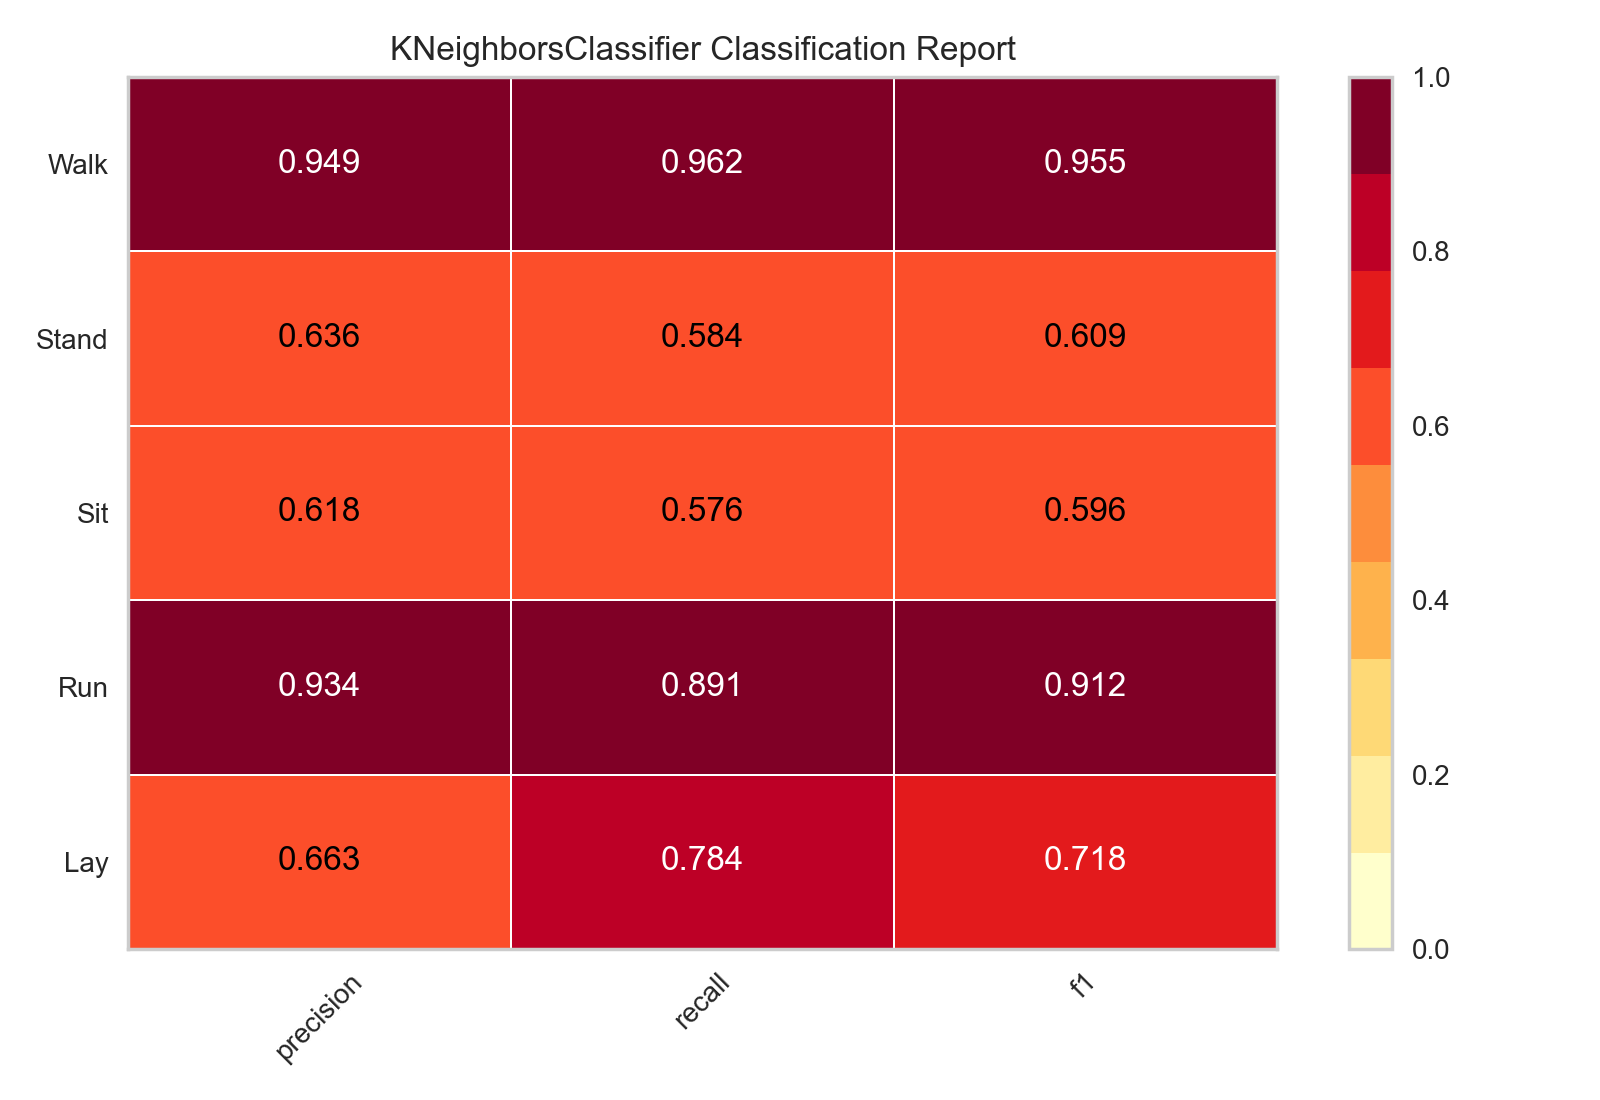

<AxesSubplot:title={'center':'KNeighborsClassifier Classification Report'}>

In [89]:
visualizer = ClassificationReport(classifier)

visualizer.fit(X_train, y_train)        # Fit the visualizer and the model
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and show the figure

In [59]:
from sklearn.model_selection import cross_val_score
#create a new KNN model
knn_cv = KNeighborsClassifier(n_neighbors=8)
#train model with cv of 5 
cv_scores = cross_val_score(knn_cv, values, labels, cv=len(sit_dataset_acc))
#print each cv score (accuracy) and average them
print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))


[0.56849617 0.60629543 0.50326109 0.61191064 0.59439813 0.56336112
 0.58730243 0.54578193 0.66960987 0.67163721 0.65895298 0.59130377]
cv_scores mean:0.5976925641880626


In [60]:
# Search for the best KNN number
from sklearn.model_selection import GridSearchCV
#create new a knn model
knn2 = KNeighborsClassifier()
#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 10)}
#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=len(sit_dataset_acc))
#fit model to data
knn_gscv.fit(values, labels)

print(knn_gscv.best_params_)
print(knn_gscv.best_score_)

KeyboardInterrupt: 